For this assignment, you will work with real world CSV weather data. You will manipulate the data to display the minimum and maximum temperature for a range of dates and demonstrate that you know how to create a line graph using matplotlib. Additionally, you will demonstrate procedure of composite charts, by overlaying a scatter plot of record breaking data for a given year.

In [18]:
import pandas as pd
df = pd.read_csv('6f49baaa5d38b70dfaa70c85c804ebc90370a013ae9e4fd2346b2115.csv')  

In [19]:
#tydying and reshaping data

df['Data_Value'] = df['Data_Value']*0.1

df[['Year','Month', "Day"]] = df.Date.str.split(expand = True, pat = "-")
df["Month_Day"] = df['Month'].str.cat(df["Day"], sep='-')
df.drop(columns=['Date', 'Month', "Day"])

df = df[df.Month_Day != "02 - 29"]
df = df.astype({"Year": int})

In [20]:
#finding max and min values

MAX = df[(df.Year >= 2005) & (df.Year < 2015) & (df['Element'] == 'TMAX')].groupby(['Month_Day'])['Data_Value'].max()
MIN = df[(df.Year >= 2005) & (df.Year < 2015) & (df['Element'] == 'TMIN')].groupby(['Month_Day'])['Data_Value'].min()

In [21]:
#finding record values

df1 = df.merge(MAX.reset_index(drop=False).rename(columns={'Data_Value':'MAX'}), on='Month_Day', how='right')
high = df1[(df1.Year==2015)&(df1.Data_Value > df1.MAX)]

df1 = df.merge(MIN.reset_index(drop=False).rename(columns={'Data_Value':'MIN'}), on='Month_Day', how='left')
low = df1[(df1.Year==2015)&(df1.Data_Value < df1.MIN)]

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

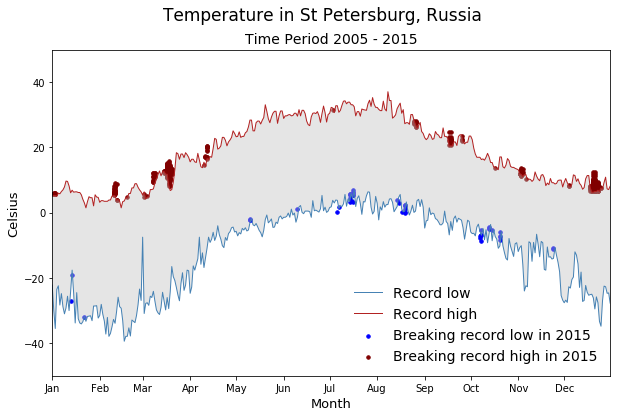

In [24]:
#creating a graphic

plt.figure(figsize=(10, 6))

date_index = np.arange('2015-01-01','2016-01-02', dtype='datetime64[D]')

plt.plot(date_index, MIN,color='steelblue', linewidth=1) 
plt.plot(date_index, MAX,color='firebrick', linewidth=1)
plt.scatter(low.Date.values, low.Data_Value.values, color='blue', s=12)
plt.scatter(high.Date.values, high.Data_Value.values, color='maroon', s=12)

ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31', -50, 50])

plt.xlabel("Month", fontsize = 13)
plt.ylabel('Celsius', fontsize=13)

title_string = "Temperature in St Petersburg, Russia"
subtitle_string = "Time Period 2005 - 2015"
plt.suptitle(title_string, fontsize=17)
plt.title(subtitle_string, fontsize=14)

plt.gca().fill_between(date_index, MAX, MIN, facecolor='silver', alpha=0.40)

plt.legend(['Record low','Record high', "Breaking record low in 2015", "Breaking record high in 2015"],loc=4, fontsize = 14, frameon=False)

X = plt.gca().xaxis
fmt = mdates.DateFormatter('%b')
X.set_major_formatter(fmt)

plt.savefig('Temperature.png')